In [10]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import make_blobs

In [11]:
# making cluster with 200 data points in 2-dimension with 3 noisy clusters
blob_data = make_blobs(n_samples=20, n_features=2, centers=3, cluster_std=1)
# the tuple of generated sample contains =>(data points in 2d, respective cluster it belongs to)
data = blob_data[0]
labels = blob_data[1]

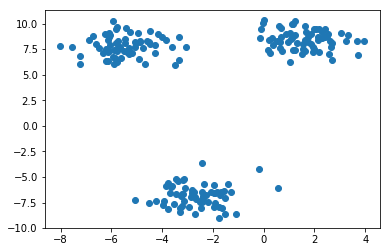

In [12]:
# Plotting the data points in 2d
datax = data[:,0]
datay = data[:, 1]
plt.scatter(datax, datay)

### Clustering Class

In [5]:
class Element(object):
    
    def __init__(self, **kwargs):
        self.center = None
        self.n_data = None
        pass

    def get_center(self):
        pass
    
    def __repr__(self):
        pass

In [6]:
class Leaf(Element):
    
    def __init__(self, data):
        self.center = data
        self.n_data = 1
    
    def get_center(self):
        return self.center, self.n_data
    
    def __repr__(self):
        return f'{self.center} -> 1'

In [7]:
class Cluster(Element):
    
    def __init__(self, node1, node2):
        self.node1 = node1
        self.node2 = node2
        
        c1, n1 = node1.get_center()
        c2, n2 = node2.get_center()
        n = n1+ n2
        c = (c1*n1 + c2*n2)/n
        
        self.n_data = n
        self.center = c
    
    def get_center(self):
        return self.center, self.n_data
    
        
    def __repr__(self):
        return f'{self.center} -> {self.n_data}'

### Making Algorithm

In [35]:
class HierarchicalClustering(object):
    
    def __init__(self, data):
        self.data = data
        self.cluster_list = []
        for dat in data:
            self.cluster_list.append(Leaf(dat))
        self.near_clusters = None
        self.n_hierarchy = 0
        
    def _distance(self, cluster1:Element, cluster2:Element):
        point1 = cluster1.center
        point2 = cluster2.center
        
        diff = point1 - point2
        sqrd = np.square(diff)
        sumd = np.sum(sqrd)
        sqrt = np.sqrt(sumd)
        return sqrt
    
    def find_nearest_center(self):
        min_dist = 9999999.
        clusteri = None
        clen = len(self.cluster_list)
        for i in range(clen):
            for j in range(i+1, clen):
                dist = self._distance(self.cluster_list[i], self.cluster_list[j])
                if dist < min_dist:
                    min_dist = dist
                    clusteri = (i, j)
        self.near_clusters = clusteri
        return self.near_clusters                
        
    def merge_nearest_clusters(self):
        cl0 = self.near_clusters[0]
        cl1 = self.near_clusters[1]
        self.near_clusters = None
        
        new_cluster = Cluster(self.cluster_list[cl0], self.cluster_list[cl1])
        self.cluster_list[cl0] = new_cluster # replacing first with
        self.cluster_list.pop(cl1)
        self.n_hierarchy += 1
    
    def do_clustering(self):
        for i in range(len(self.cluster_list)-1):
            self.find_nearest_center()
#             print(self.near_clusters)
            self.merge_nearest_clusters()
        
    
    def print_cluster(self, cluster=None, spacing="    "):

        if cluster is None:
            cluster = self.cluster_list[0]

        if isinstance(cluster, Leaf):
            print (spacing +'===>', cluster.center)
            return

        # Print the center of this cluster
        print (spacing + str(cluster.center))

        # Call this function recursively on first node
        print (spacing + '--> 1:'+ str(cluster.n_data))
        self.print_cluster(cluster.node1, spacing + "     ")

        # Call this function recursively on the false branch
        print (spacing + '--> 2:'+ str(cluster.n_data))
        self.print_cluster(cluster.node2, spacing + "     ")

In [36]:
hc = HierarchicalClustering(data)

In [37]:
hc.cluster_list

[[ 2.5793388  -3.24944962] -> 1,
 [-1.73218527 -1.61277911] -> 1,
 [ 3.0027444 -4.5700756] -> 1,
 [ 4.15740848 -4.44394899] -> 1,
 [ 3.35116079 -4.69165055] -> 1,
 [-0.15031291 -0.38491921] -> 1,
 [-0.93655021  0.40254481] -> 1,
 [ 2.91666152 -5.84116704] -> 1,
 [-1.62034769  6.44318548] -> 1,
 [-1.63416661  7.16139365] -> 1,
 [ 3.45824425 -2.70424982] -> 1,
 [-2.50430489 -0.02565726] -> 1,
 [-0.17058494  0.54994562] -> 1,
 [-1.39588613  0.42697182] -> 1,
 [-0.52329871  7.20637757] -> 1,
 [0.13857906 5.17708025] -> 1,
 [-1.98884451  7.01678848] -> 1,
 [0.21443032 2.70166865] -> 1,
 [ 2.69109287 -4.37326056] -> 1,
 [-1.06671518  5.57888868] -> 1]

In [38]:
hc.do_clustering()

(2, 18)
(9, 16)
(6, 13)
(2, 4)
(7, 8)
(4, 10)
(0, 8)
(4, 5)
(2, 3)
(5, 7)
(7, 9)
(2, 4)
(1, 5)
(1, 3)
(0, 2)
(2, 3)
(1, 3)
(1, 2)
(0, 1)


In [39]:
hc.n_hierarchy

19

In [40]:
hc.print_cluster()

    [0.43932317 0.53838436]
    --> 1:20
         [ 3.16523587 -4.26768603]
         --> 1:7
              [ 3.01879153 -2.97684972]
              --> 1:2
                   ===> [ 2.5793388  -3.24944962]
              --> 2:2
                   ===> [ 3.45824425 -2.70424982]
         --> 2:7
              [ 3.22381361 -4.78402055]
              --> 1:5
                   [ 3.30060164 -4.51973392]
                   --> 1:4
                        [ 3.01499936 -4.54499557]
                        --> 1:3
                             [ 2.84691864 -4.47166808]
                             --> 1:2
                                  ===> [ 3.0027444 -4.5700756]
                             --> 2:2
                                  ===> [ 2.69109287 -4.37326056]
                        --> 2:3
                             ===> [ 3.35116079 -4.69165055]
                   --> 2:4
                        ===> [ 4.15740848 -4.44394899]
              --> 2:5
                   ===> [ 2.91666152 